# Affine Structure from Motion

This notebook demonstrates the Affine Structure from Motion (SfM) algorithm, which reconstructs 3D structure from 2D point correspondences across multiple frames of a video sequence.

In [4]:
import os
import sys
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

# Add parent directory to path to import the module
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from sfm import get_measurement_matrix, affineSFM, plot_X, get_cam_pos, plot_cam_pos

## Data Loading

Load tracked points from a MAT file. In this example, we use a pre-computed set of tracked points from a video sequence of a hotel.

In [5]:
# Load tracked points
data_path = '../data/tracks.mat'

try:
    data = loadmat(data_path)
    track_x = data['track_x']
    track_y = data['track_y']
    print(f"Loaded tracks with shape: {track_x.shape}")
except FileNotFoundError:
    print(f"Data file not found at {data_path}")
    print("Please download the data file and place it in the 'data' directory.")
    print("Data can be downloaded from: https://drive.google.com/file/d/1A0Rin_YMmWkExjI99vfLYvU_dy-9gFTT/view")

Loaded tracks with shape: (500, 51)


## Data Preprocessing

Check for missing values (NaN) and filter out frames that contain any missing values.

In [6]:
# Check for NaN values
is_nan = np.isnan(track_x) | np.isnan(track_y)
num_points = np.prod(track_x.shape)
nan_count = is_nan.sum()
print(f"Total points: {num_points}, NaN count: {nan_count}, NaN percentage: {nan_count/num_points:.2%}")

# Remove rows with NaN values
is_valid = ~is_nan
valid_row_indices = is_valid.all(axis=1)
track_x_clean = track_x[valid_row_indices]
track_y_clean = track_y[valid_row_indices]
print(f"Using {track_x_clean.shape[0]} valid frames out of {track_x.shape[0]} total frames")
print(f"Shape of cleaned data: {track_x_clean.shape}")

Total points: 25500, NaN count: 3410, NaN percentage: 13.37%
Using 400 valid frames out of 500 total frames
Shape of cleaned data: (400, 51)


## Run Affine Structure from Motion

The algorithm works as follows:
1. Create a measurement matrix from tracked points
2. Decompose the matrix using SVD and enforce rank 3 constraint
3. Apply orthographic constraints to recover the 3D structure

In [7]:
# Run the SfM algorithm
A, X = affineSFM(track_x_clean, track_y_clean)

print(f"Shape of camera motion matrix A: {A.shape}")
print(f"Shape of 3D structure matrix X: {X.shape}")

Shape of camera motion matrix A: (102, 3)
Shape of 3D structure matrix X: (3, 400)


## Visualize 3D Point Cloud

Let's visualize the 3D point cloud from different viewpoints.

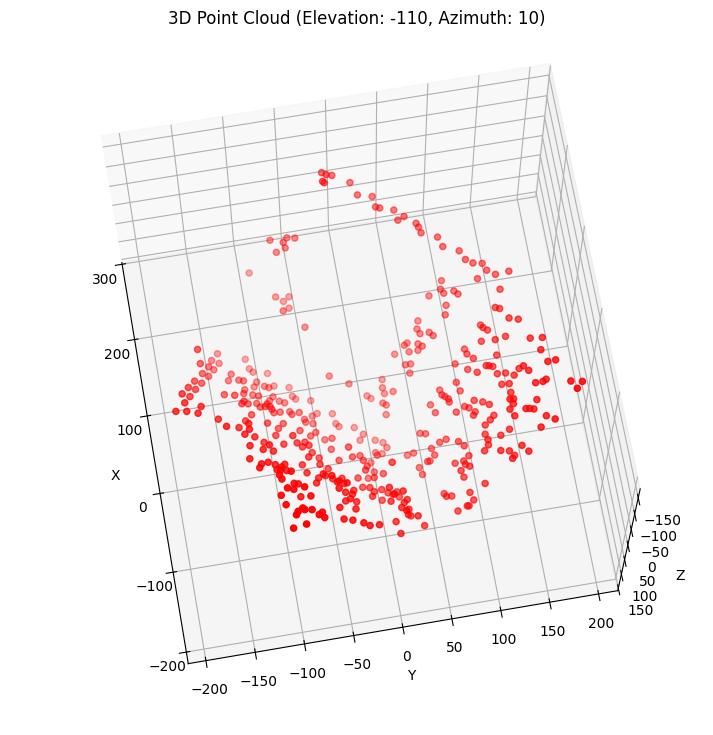

In [8]:
# Default viewpoint
plot_X(X)

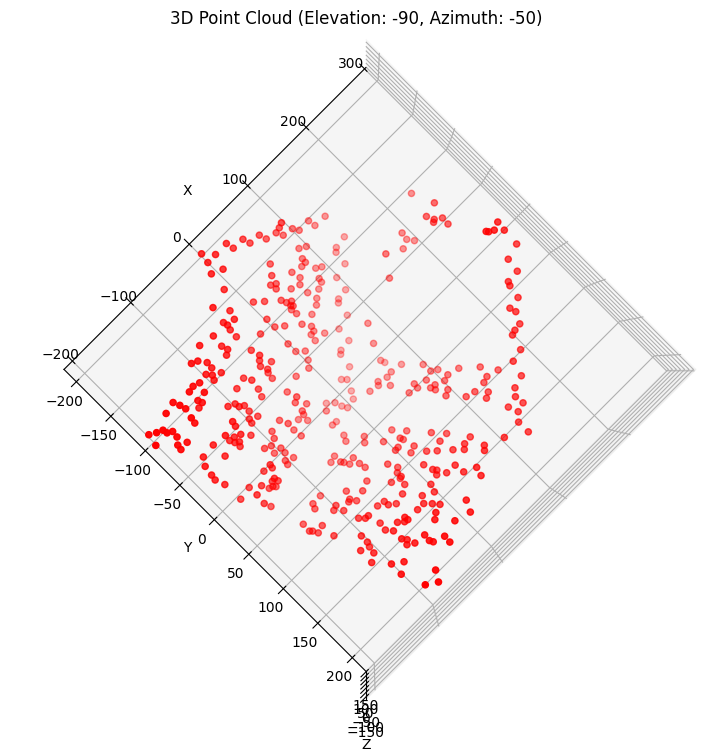

In [9]:
# Alternative viewpoint 1
plot_X(X, elev=-90, azim=-50)

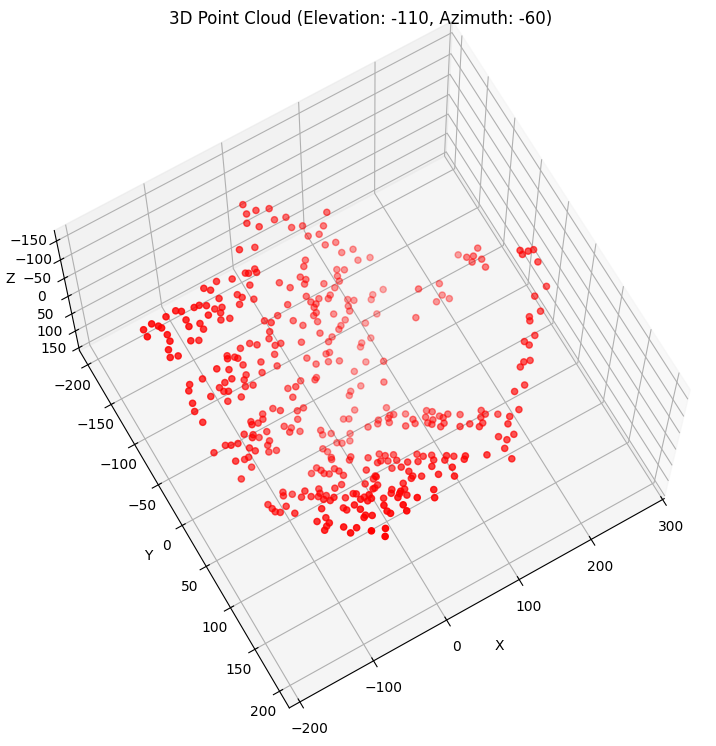

In [10]:
# Alternative viewpoint 2
plot_X(X, elev=-110, azim=-60)

## Visualize Camera Motion

We can also visualize the camera motion over time by extracting the camera positions from the motion matrix.

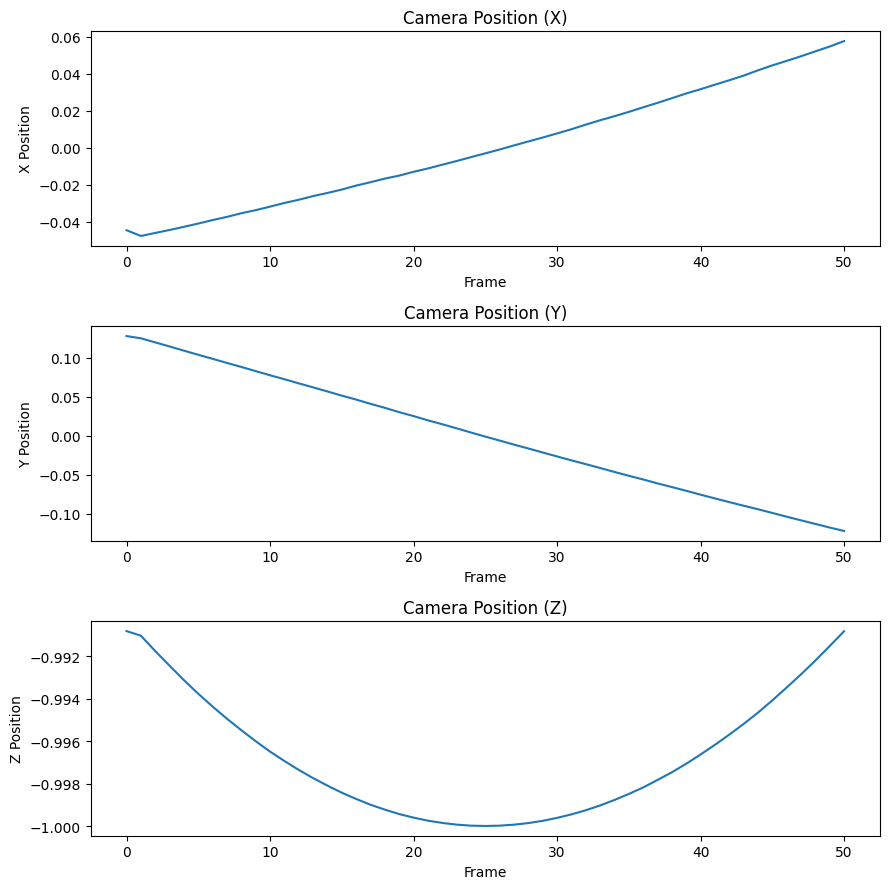

In [11]:
# Plot camera positions
plot_cam_pos(A)

## Visualize Camera Path in 3D

Let's visualize the camera path in 3D space alongside the reconstructed points.

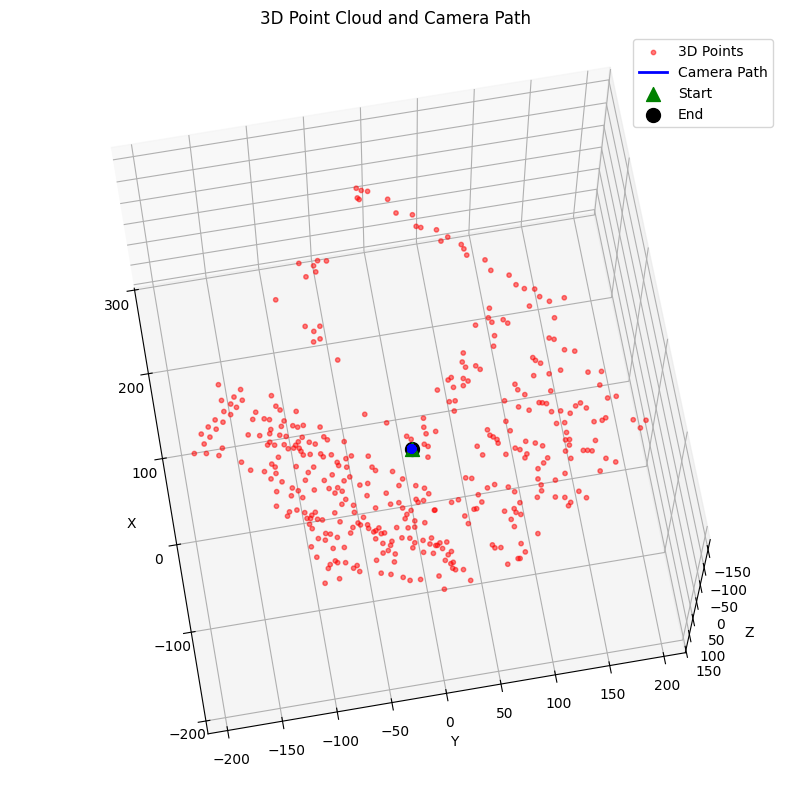

In [12]:
# Get camera positions
cam_pos = get_cam_pos(A)

# Plot 3D points and camera path
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(projection='3d')

# Plot 3D points
xs, ys, zs = X
ax.scatter(xs, ys, zs, color='r', s=10, alpha=0.5, label='3D Points')

# Plot camera path
ax.plot(cam_pos[:, 0], cam_pos[:, 1], cam_pos[:, 2], 'b-', linewidth=2, label='Camera Path')
ax.scatter(cam_pos[:, 0], cam_pos[:, 1], cam_pos[:, 2], color='blue', s=30)
# Mark start and end of camera path
ax.scatter(cam_pos[0, 0], cam_pos[0, 1], cam_pos[0, 2], color='green', s=100, marker='^', label='Start')
ax.scatter(cam_pos[-1, 0], cam_pos[-1, 1], cam_pos[-1, 2], color='black', s=100, marker='o', label='End')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Point Cloud and Camera Path')
ax.legend()

# Set view angle
ax.view_init(elev=-110, azim=10)
plt.show()

## Conclusion

The Affine Structure from Motion algorithm successfully reconstructs the 3D structure from 2D point correspondences. The algorithm:

1. Creates a measurement matrix from point tracks
2. Decomposes the matrix using SVD
3. Applies orthographic constraints
4. Recovers both the 3D structure and camera motion

The visualizations show that we can recover the 3D structure of the scene and the camera path from 2D point tracks.